In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

db = pd.read_csv('Database.csv')
x = db.loc[:,'Electronegativity':'Exposure dose (ug/mL)'].values
y = db.loc[:,'Newtox'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.svm import SVR
regressor = SVR(C= 15, gamma= 4, degree= 1000, epsilon= 0.015625, kernel= 'rbf')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)

Q2: -0.04375691312512082
r2_test: 0.5540468702628015
MAE_test: 0.03587225704829168
MSE_test: 0.003784355548845851
RMSE_test: 0.06151711590155906
r2_train: 0.6444681513195418
MAE_train: 0.027022601495530946
MSE_train: 0.0021527452737136175
RMSE_train: 0.046397686081459034


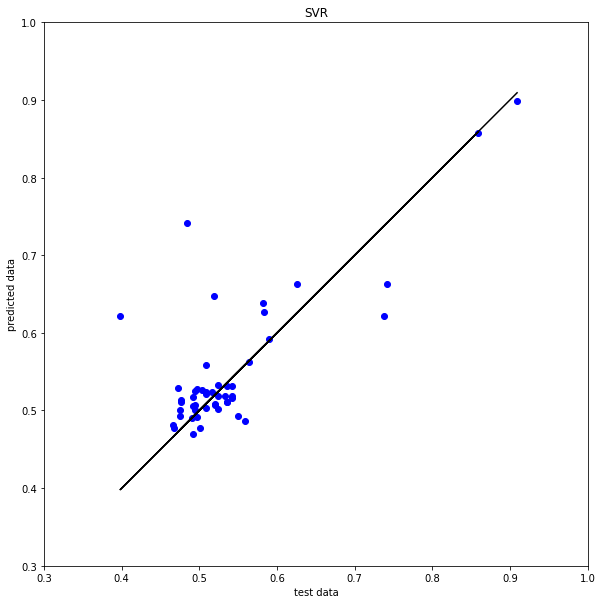

In [75]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                        scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
a, dx = plt.subplots(figsize=(13, 10))
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_test, color = 'black')
plt.title('SVR')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(0.3, 1)
plt.ylim(0.3, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
import time

import matplotlib.figure as figure
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
from sklearn import model_selection, svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV

# Settings
svr_cs = 2 ** np.arange(-5, 11, dtype=float)  # Candidates of C
svr_epsilons = 2 ** np.arange(-10, 1, dtype=float)  # Candidates of epsilon
svr_gammas = 2 ** np.arange(-20, 11, dtype=float)  # Candidates of gamma
fold_number = 5  # "fold_number"-fold cross-validation
number_of_training_samples = 1000
number_of_test_samples = 1000

# Generate samples for demonstration
X, y = datasets.make_regression(n_samples=number_of_training_samples + number_of_test_samples, n_features=100,
                                n_informative=100, noise=100, random_state=0)

# Divide samples into training samples and test samples
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=number_of_test_samples, random_state=0)

# Standarize X and y
autoscaled_Xtrain = (Xtrain - Xtrain.mean(axis=0)) / Xtrain.std(axis=0, ddof=1)
autoscaled_ytrain = (ytrain - ytrain.mean()) / ytrain.std(ddof=1)
autoscaled_Xtest = (Xtest - Xtrain.mean(axis=0)) / Xtrain.std(axis=0, ddof=1)

# Measure time in hyperparameter optimization
start_time = time.time()

# Optimize gamma by maximizing variance in Gram matrix
numpy_autoscaled_Xtrain = np.array(autoscaled_Xtrain)
variance_of_gram_matrix = list()
for svr_gamma in svr_gammas:
    gram_matrix = np.exp(
        -svr_gamma * ((numpy_autoscaled_Xtrain[:, np.newaxis] - numpy_autoscaled_Xtrain) ** 2).sum(axis=2))
    variance_of_gram_matrix.append(gram_matrix.var(ddof=1))
optimal_svr_gamma = svr_gammas[np.where(variance_of_gram_matrix == np.max(variance_of_gram_matrix))[0][0]]

# Optimize epsilon with cross-validation
svr_model_in_cv = GridSearchCV(svm.SVR(kernel='rbf', C=3, gamma=optimal_svr_gamma), {'epsilon': svr_epsilons},
                               cv=fold_number)
svr_model_in_cv.fit(autoscaled_Xtrain, autoscaled_ytrain)
optimal_svr_epsilon = svr_model_in_cv.best_params_['epsilon']

# Optimize C with cross-validation
svr_model_in_cv = GridSearchCV(svm.SVR(kernel='rbf', epsilon=optimal_svr_epsilon, gamma=optimal_svr_gamma),
                               {'C': svr_cs}, cv=fold_number)
svr_model_in_cv.fit(autoscaled_Xtrain, autoscaled_ytrain)
optimal_svr_c = svr_model_in_cv.best_params_['C']

# Optimize gamma with cross-validation (optional)
svr_model_in_cv = GridSearchCV(svm.SVR(kernel='rbf', epsilon=optimal_svr_epsilon, C=optimal_svr_c),
                               {'gamma': svr_gammas}, cv=fold_number)
svr_model_in_cv.fit(autoscaled_Xtrain, autoscaled_ytrain)
optimal_svr_gamma = svr_model_in_cv.best_params_['gamma']

# Check time in hyperparameter optimization
elapsed_time = time.time() - start_time
print("Elapsed time in hyperparameter optimization: {0} [sec]".format(elapsed_time))

# Check optimized hyperparameters
print("C: {0}, Epsion: {1}, Gamma: {2}".format(optimal_svr_c, optimal_svr_epsilon, optimal_svr_gamma))

Elapsed time in hyperparameter optimization: 44.30457520484924 [sec]
C: 8.0, Epsion: 0.015625, Gamma: 0.0009765625
